## Credit Card Fraud Detection Capstone Project


In [ ]:
# Importing all the following libraries to get started

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

#%cd /content/gdrive/MyDrive/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#observe the different feature type present in the data
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print(normal_share,fraud_share)

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798 0.1727485630620034


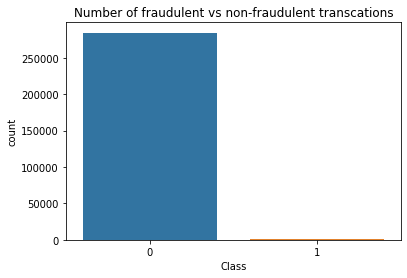

In [ ]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations

sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

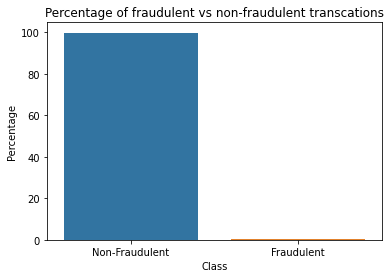

In [ ]:
# Create a bar plot for the percentage of fraudulent vs non-fraudulent transcations

fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


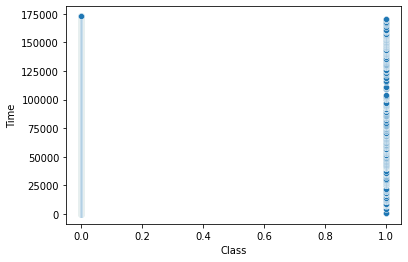

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df['Class'],df['Time'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


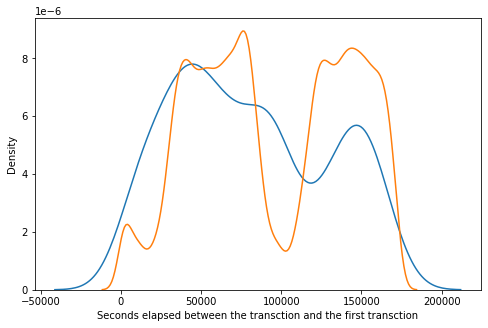

In [ ]:
# Create a dist plot to observe the distribution of classes with time

# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

Based on the above graphs,we can drop the Time column as it seems to be a non hepful feature

In [ ]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


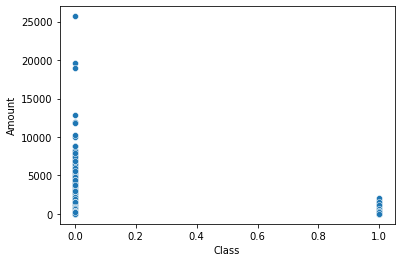

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df['Class'],df['Amount'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


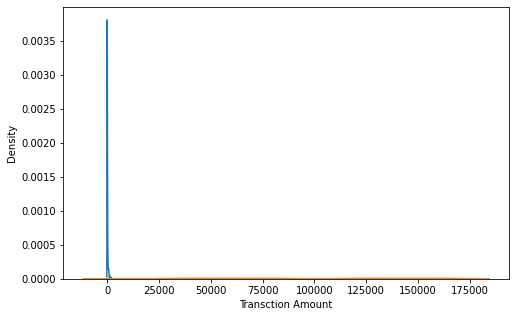

In [ ]:
# Create a dist plot to observe the distribution of classes with Amount
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

We can observe that the fraudulent transctions are mostly scattered in the lower range of amount



### Splitting the data into train & test data

In [ ]:
y = df['Class']

In [ ]:
X = df.drop(['Class'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
#splitting with strtify
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100, stratify=y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


### Plotting the distribution of a variable

In [ ]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

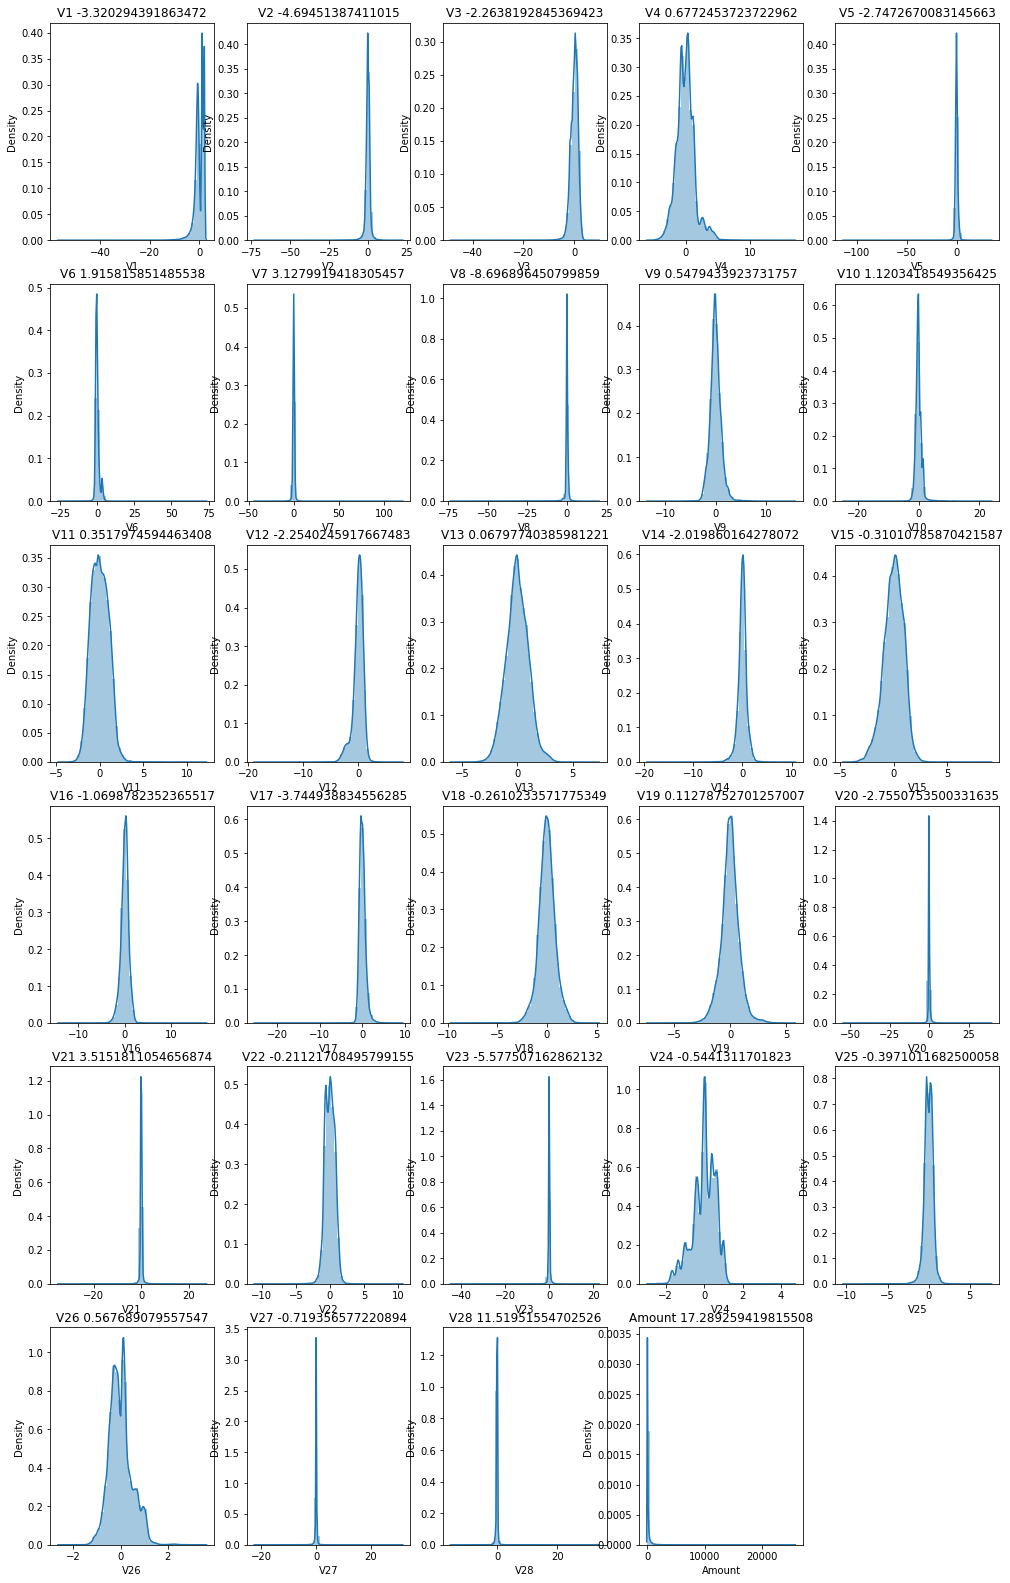

In [ ]:
# plot the histogram of variables from the dataset to see the skewness
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We can observe many features with skewness in distribution

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

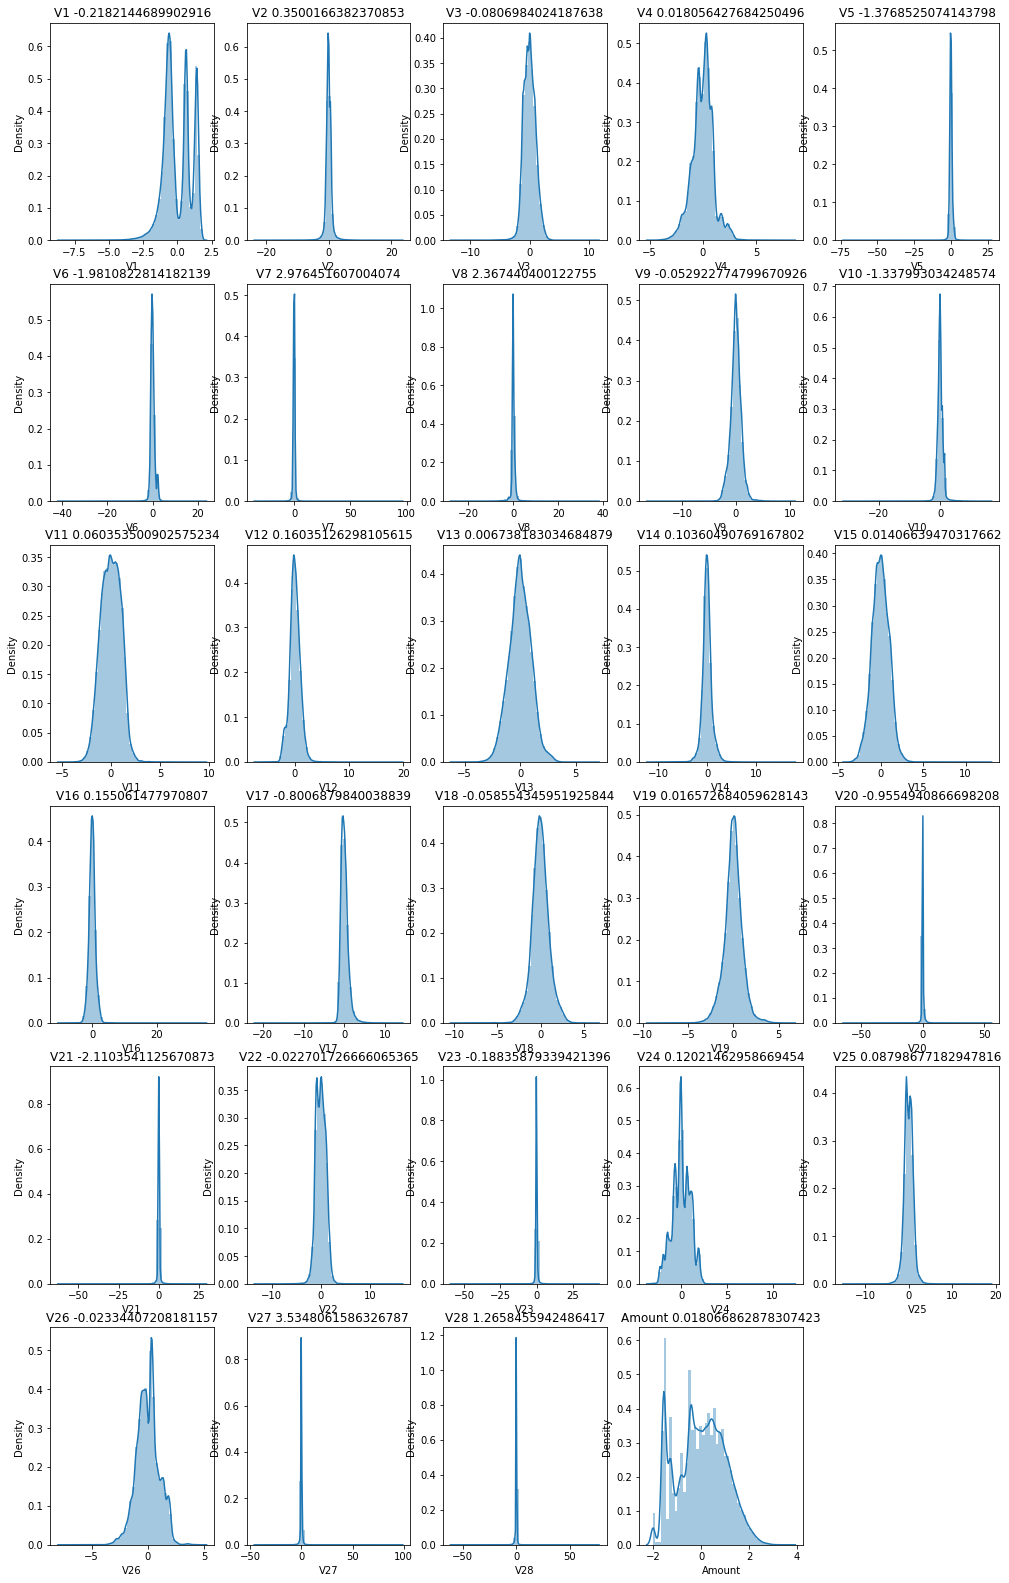

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.793131,0.016783,0.026484,0.003251,0.01,{'C': 0.01},0.954333,0.975553,0.994302,0.978814,...,0.979699,0.014994,1,0.987158,0.984523,0.980650,0.983889,0.979354,0.983115,0.002798
1,1.038277,0.084347,0.024847,0.000565,0.1,{'C': 0.1},0.955359,0.971752,0.995374,0.977356,...,0.978760,0.014871,2,0.986213,0.983388,0.979287,0.981889,0.978154,0.981786,0.002885
2,1.288532,0.241402,0.025255,0.001382,1,{'C': 1},0.954665,0.970190,0.995361,0.976886,...,0.978120,0.015154,3,0.985649,0.982920,0.978725,0.981021,0.977756,0.981214,0.002855
3,1.167364,0.096350,0.026000,0.001727,10,{'C': 10},0.954556,0.969992,0.995351,0.976824,...,0.978034,0.015198,4,0.985574,0.982861,0.978652,0.980912,0.977706,0.981141,0.002851
4,1.153038,0.101003,0.025141,0.001458,100,{'C': 100},0.954550,0.969964,0.995350,0.976813,...,0.978024,0.015202,5,0.985567,0.982856,0.978646,0.980900,0.977702,0.981134,0.002851
5,1.183877,0.097962,0.024604,0.000642,1000,{'C': 1000},0.954548,0.969963,0.995350,0.976812,...,0.978023,0.015202,6,0.985566,0.982855,0.978645,0.980899,0.977702,0.981133,0.002851


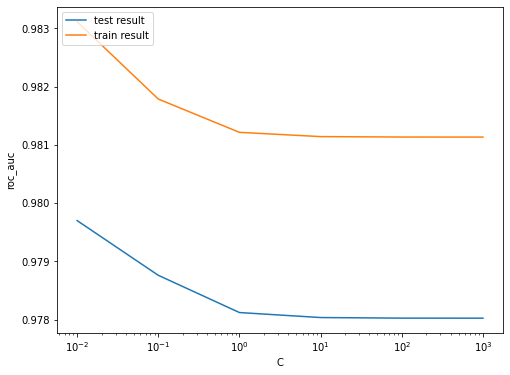

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9796991913933049 at C = 0.01


Logistic regression model with optimal value of C

In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [ ]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

In [ ]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227424     27]
 [   138    256]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992758234764862
Sensitivity:- 0.649746192893401
Specificity:- 0.9998812931136817
F1-Score:- 0.7562776957163958


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.65      0.76       394

    accuracy                           1.00    227845
   macro avg       0.95      0.82      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

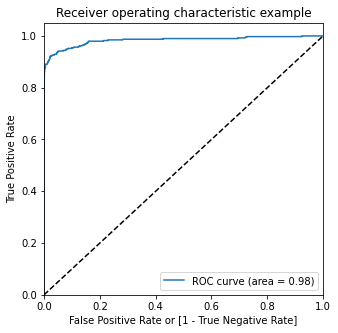

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855     9]
 [   43    55]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9990871107053826
Sensitivity:- 0.5612244897959183
Specificity:- 0.9998417276308385
F1-Score:- 0.6790123456790124


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.56      0.68        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

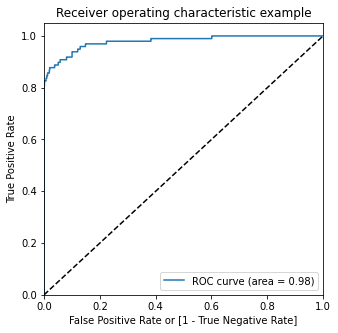

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Overall the model is performing okay with consistent roc curve of 0.98 on train and test

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

*Since **KNN** and **SVM** are computational expensive algorithms it has been left out from the solution after trying to implement*

**XGBoost**

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=20)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=20),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.545066,0.232090,0.056006,0.001042,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.951604,0.946793,0.928853,0.942417,0.009790,4,0.954814,0.957029,0.961743,0.957862,0.002890
1,4.282836,0.179927,0.054183,0.000681,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.938574,0.926812,0.922825,0.929404,0.006686,5,0.937915,0.942408,0.938462,0.939595,0.002002
2,4.304410,0.072089,0.054322,0.000967,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.938667,0.926943,0.919494,0.928368,0.007892,6,0.936204,0.938715,0.935056,0.936658,0.001528
3,3.295525,0.012829,0.066453,0.000222,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.979471,0.973638,0.969305,0.974138,0.004165,3,0.984867,0.988522,0.990226,0.987871,0.002236
4,4.195371,0.018520,0.065856,0.001418,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975787,0.984440,0.974737,0.978321,0.004348,2,0.989691,0.990071,0.993155,0.990973,0.001551
5,4.370690,0.092936,0.066149,0.001338,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.980271,0.983861,0.980082,0.981405,0.001739,1,0.992636,0.993708,0.993052,0.993132,0.000441


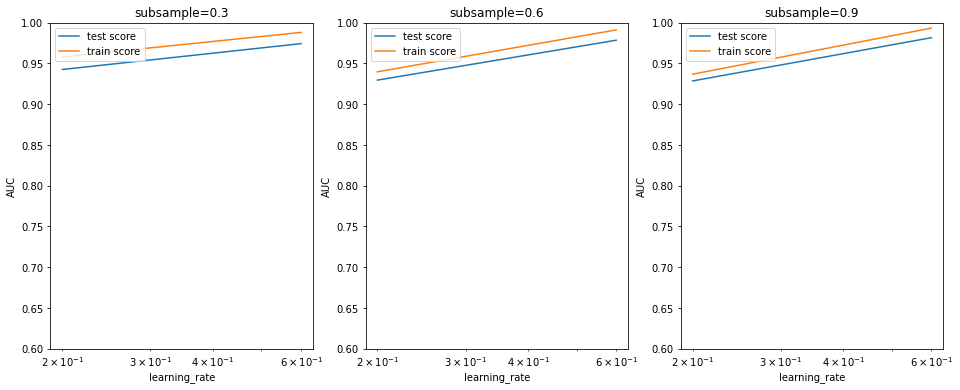

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
#Best parameters
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen best hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':20,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 20,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227441     10]
 [    62    332]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9996839956988304
Sensitivity:- 0.8426395939086294
Specificity:- 0.9999560344865488
F1-Score:- 0.9021739130434782


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.97      0.84      0.90       394

    accuracy                           1.00    227845
   macro avg       0.99      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

0.9974015488849531

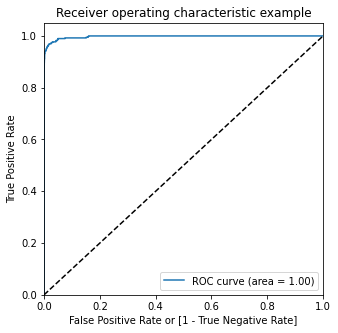

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56855     9]
 [   23    75]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994382219725431
Sensitivity:- 0.7653061224489796
Specificity:- 0.9998417276308385
F1-Score:- 0.8241758241758241


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.77      0.82        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.970484535964076

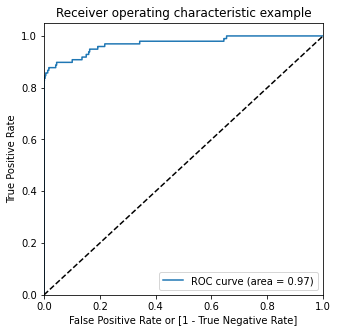

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model is performing well based on above results

**Decision Tree**

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 8, 2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 8, 2),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.348203,0.006438,0.022803,0.000320,2,50,50,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",0.897594,0.885258,0.881475,0.888109,0.006882,11
1,1.355207,0.006661,0.022587,0.000239,2,50,100,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",0.897594,0.885258,0.881475,0.888109,0.006882,11
2,1.345707,0.004042,0.022975,0.000485,2,100,50,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",0.901311,0.911877,0.900550,0.904579,0.005170,9
3,1.354381,0.020522,0.022629,0.000100,2,100,100,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",0.901311,0.911877,0.900550,0.904579,0.005170,9
4,2.649485,0.014131,0.023727,0.000379,4,50,50,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.925913,0.915572,0.904360,0.915282,0.008801,8
5,2.642343,0.007068,0.023551,0.000210,4,50,100,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.941053,0.915579,0.911966,0.922866,0.012944,7
6,2.647656,0.022998,0.022980,0.000240,4,100,50,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.941014,0.919248,0.938674,0.932978,0.009756,5
7,2.631421,0.002670,0.023165,0.000313,4,100,100,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.941014,0.919248,0.938674,0.932978,0.009756,5
8,3.952395,0.008205,0.024884,0.000165,6,50,50,"{'max_depth': 6, 'min_samples_leaf': 50, 'min_...",0.926267,0.946567,0.938872,0.937235,0.008368,3
9,3.939276,0.016386,0.024286,0.000176,6,50,100,"{'max_depth': 6, 'min_samples_leaf': 50, 'min_...",0.941414,0.931344,0.931261,0.934673,0.004767,4


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9538783242800938
DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [ ]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999113432377274
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.729946524064171


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.69      0.73       394

    accuracy                           1.00    227845
   macro avg       0.89      0.85      0.86    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9691595704207793

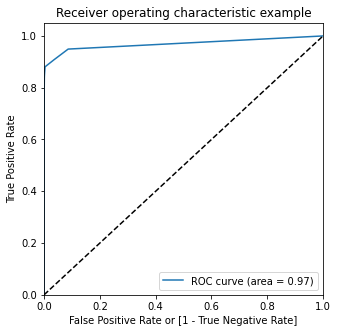

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56835    29]
 [   30    68]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989642217618764
Sensitivity:- 0.6938775510204082
Specificity:- 0.999490011254924
F1-Score:- 0.729946524064171


In [ ]:

# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:

# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9313603061511604

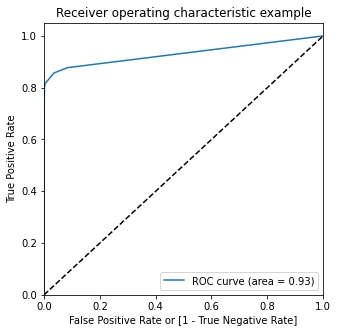

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Random Forest**

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': range(2,8,2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [10, 20], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 8, 2), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [10, 20]},
             return_train_score=True, verbose=1)

In [ ]:
#printing the optimal accuracy score and hyperparameters
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9992187669902126
{'max_depth': 4, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 10}


In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=20)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227451      0]
 [     0    394]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992802124251136
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7813333333333332


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.82      0.74      0.78       394

    accuracy                           1.00    227845
   macro avg       0.91      0.87      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9679744710786929

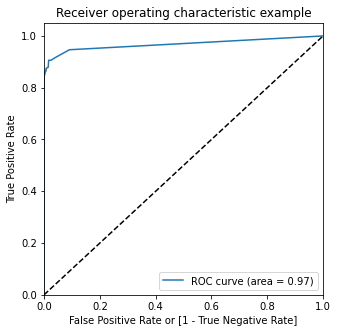

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56843    21]
 [   28    70]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991397773954567
Sensitivity:- 0.7142857142857143
Specificity:- 0.9996306978052898
F1-Score:- 0.7813333333333332


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.71      0.74        98

    accuracy                           1.00     56962
   macro avg       0.88      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9318714613025851

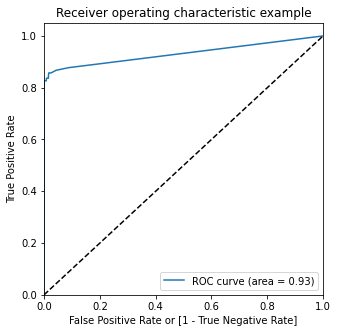

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Choosing best model(on imbalanced data)**

All the models tried above performed well. Especially logistic regression had roc curve of 0.98 on test data and xgboost had 0.97. Hence also **logistic regression** being a simpler model I'm selecting it as the best model on imbalanced data.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logistic_imb_model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

   Attribute  Importance
3         V4    0.616148
10       V11    0.162311
20       V21    0.116565
21       V22    0.099913
25       V26    0.050972
17       V18    0.044722
4         V5    0.043513
5         V6    0.030752
23       V24    0.017501
24       V25    0.004734
28    Amount   -0.018983
27       V28   -0.030714
19       V20   -0.034083
16       V17   -0.052861
26       V27   -0.063053
1         V2   -0.064135
22       V23   -0.064315
18       V19   -0.083345
12       V13   -0.100948
6         V7   -0.104717
14       V15   -0.115228
0         V1   -0.156537
8         V9   -0.165342
9        V10   -0.187720
7         V8   -0.192124
15       V16   -0.195860
2         V3   -0.278499
11       V12   -0.476390
13       V14   -0.661204


## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

**Random Oversampling**

In [ ]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
# instantiating the random oversampler 
ros = RandomOverSampler(random_state=100)
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.155214,0.052605,0.042541,0.000788,0.01,{'C': 0.01},0.987176,0.987964,0.987814,0.987418,...,0.987568,0.000284,6,0.987686,0.987511,0.987544,0.987549,0.987619,0.987582,0.000063
1,2.115620,0.075964,0.042642,0.000741,0.1,{'C': 0.1},0.987229,0.988030,0.987877,0.987481,...,0.987631,0.000287,5,0.987748,0.987576,0.987604,0.987611,0.987686,0.987645,0.000063
2,2.047385,0.069795,0.042251,0.000955,1,{'C': 1},0.987235,0.988036,0.987885,0.987485,...,0.987637,0.000288,4,0.987753,0.987581,0.987610,0.987617,0.987691,0.987650,0.000063
3,2.059979,0.059262,0.042768,0.000847,10,{'C': 10},0.987235,0.988037,0.987886,0.987485,...,0.987638,0.000288,2,0.987753,0.987582,0.987611,0.987618,0.987692,0.987651,0.000063
4,2.042246,0.068232,0.041813,0.000723,100,{'C': 100},0.987235,0.988037,0.987886,0.987485,...,0.987638,0.000288,3,0.987753,0.987582,0.987611,0.987618,0.987692,0.987651,0.000063
5,2.054436,0.062454,0.043356,0.002288,1000,{'C': 1000},0.987235,0.988037,0.987886,0.987485,...,0.987638,0.000288,1,0.987753,0.987582,0.987611,0.987618,0.987692,0.987651,0.000063


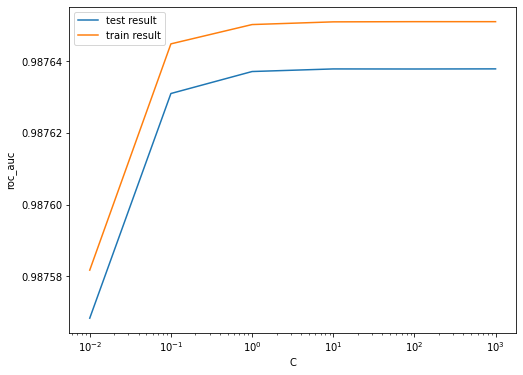

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9876379391664039 at C = 1000


In [ ]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=1000)


In [ ]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)


In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[221875   5576]
 [ 16756 210695]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9509081076803355
Sensitivity:- 0.9263313856610874
Specificity:- 0.9754848296995836
F1-Score:- 0.9496711905201906


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9876488554210692

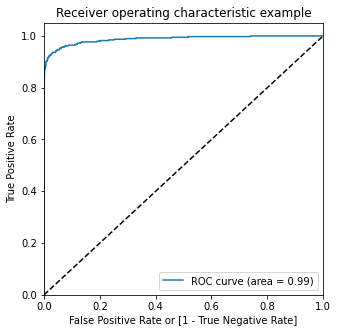

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55506  1358]
 [   11    87]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9759664337628594
Sensitivity:- 0.8877551020408163
Specificity:- 0.976118458075408


In [ ]:

# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9780677025312094

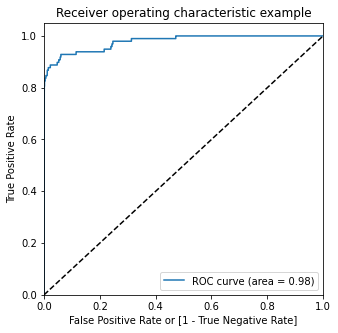

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set:**
Accuracy = 0.95
Sensitivity = 0.93
Specificity = 0.98
ROC = 0.99 ||| 
**Test set:**
Accuracy = 0.98
Sensitivity = 0.89
Specificity = 0.98
ROC = 0.98

XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=20)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)    

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=20),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,6.529931,0.057003,0.128468,0.002493,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.993498,0.993887,0.994262,0.993882,0.000312,6,0.993733,0.993968,0.994151,0.993951,0.000171
1,7.470069,0.011513,0.125264,0.001476,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.993881,0.994140,0.994422,0.994147,0.000221,5,0.994069,0.994183,0.994318,0.994190,0.000102
2,7.413927,0.051730,0.123261,0.000901,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.993527,0.994649,0.994337,0.994171,0.000473,4,0.993760,0.994708,0.994197,0.994221,0.000387
3,6.487690,0.005254,0.130349,0.002733,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.998557,0.998969,0.998596,0.998707,0.000186,3,0.998659,0.998970,0.998595,0.998741,0.000163
4,7.488067,0.013549,0.132045,0.001566,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.998841,0.998673,0.998758,0.998758,0.000069,2,0.998939,0.998750,0.998648,0.998779,0.000120
5,7.430100,0.026725,0.129990,0.001835,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.998900,0.998831,0.998658,0.998797,0.000102,1,0.998983,0.998839,0.998577,0.998800,0.000168


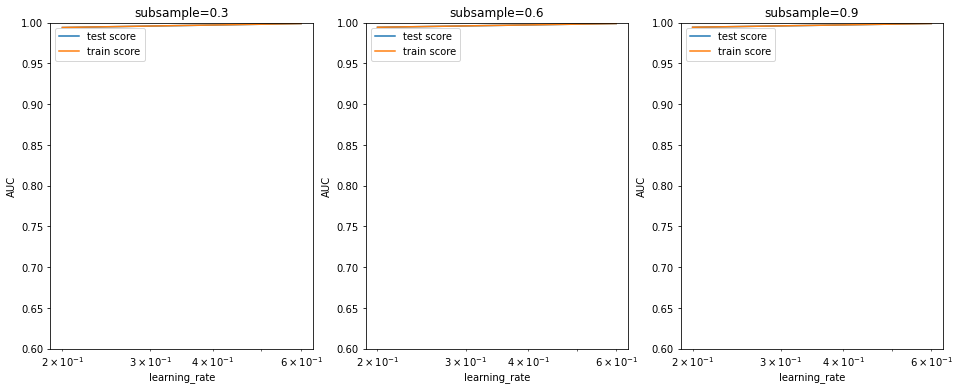

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':20,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 20,
                      'objective': 'binary:logistic', 'subsample': 0.9})

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227451      0]
 [     0 227451]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9972939226470756
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997307248623564

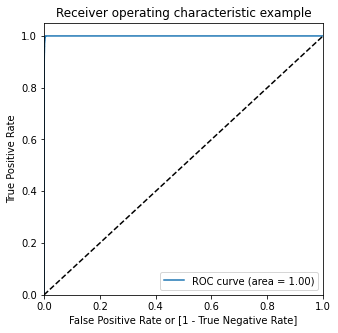

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56551   313]
 [   15    83]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9942417752185667
Sensitivity:- 0.8469387755102041
Specificity:- 0.9944956387169387


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.85      0.34        98

    accuracy                           0.99     56962
   macro avg       0.60      0.92      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9748603542429914

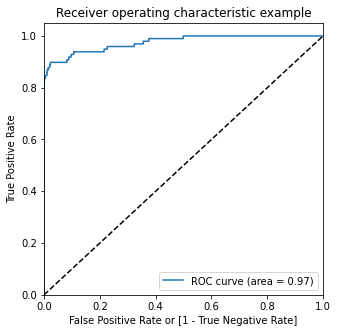

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set:**
Accuracy = 1.0
Sensitivity = 1.0
Specificity = 1.0
ROC = 1.0 ||| 
**Test set:**
Accuracy = 0.99
Sensitivity = 0.85
Specificity = 0.99
ROC = 0.97

Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2,8,2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 8, 2),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.718992,0.003566,0.045580,0.000547,2,50,50,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",0.966075,0.966647,0.963698,0.965473,0.001277,9
1,1.702091,0.003065,0.045070,0.000192,2,50,100,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",0.966075,0.966647,0.963698,0.965473,0.001277,9
2,1.707958,0.005666,0.045686,0.001208,2,100,50,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",0.966075,0.966647,0.963698,0.965473,0.001277,9
3,1.702508,0.002377,0.045159,0.000299,2,100,100,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",0.966075,0.966647,0.963698,0.965473,0.001277,9
4,3.213166,0.011611,0.048639,0.000730,4,50,50,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.988233,0.987846,0.986601,0.987560,0.000696,7
5,3.212102,0.008105,0.048923,0.000604,4,50,100,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.988233,0.987846,0.986601,0.987560,0.000696,7
6,3.225597,0.004348,0.049889,0.000680,4,100,50,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.988305,0.987917,0.986757,0.987660,0.000658,5
7,3.229833,0.006193,0.048977,0.000676,4,100,100,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.988305,0.987917,0.986757,0.987660,0.000658,5
8,4.609202,0.019143,0.049627,0.000777,6,50,50,"{'max_depth': 6, 'min_samples_leaf': 50, 'min_...",0.996600,0.996577,0.995448,0.996208,0.000537,2
9,4.595950,0.003221,0.049328,0.000564,6,50,100,"{'max_depth': 6, 'min_samples_leaf': 50, 'min_...",0.996600,0.996580,0.995448,0.996209,0.000538,1


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9962093606046807
DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[223692   3759]
 [  5267 222184]]


In [ ]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9801583637794514
Sensitivity:- 0.9768433640652272
Specificity:- 0.9834733634936755


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    227451
           1       0.98      0.98      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.995625186408113

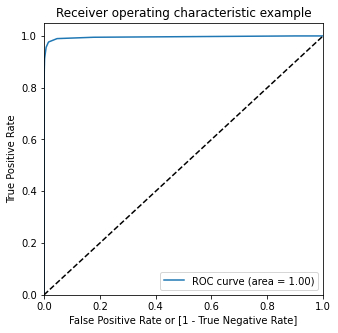

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55960   904]
 [   18    80]]


In [ ]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9838137705838981
Sensitivity:- 0.8163265306122449
Specificity:- 0.9841024198086663


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.82      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.90      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9032161770870418

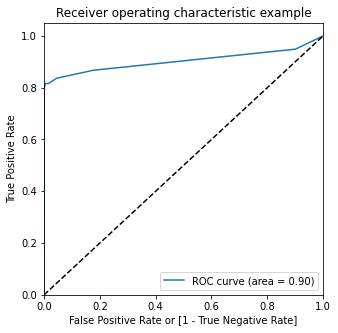

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set:**
Accuracy = 0.98
Sensitivity = 0.98
Specificity = 0.98
ROC = 1.0 ||| 
**Test set:**
Accuracy = 0.98
Sensitivity = 0.82
Specificity = 0.98
ROC = 0.9

**SMOTE**

### Print the class distribution after applying SMOTE 

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
print('Before SMOTE oversampling X_train shape=',Counter(y_train))
print('After SMOTE oversampling y_train shape=',Counter(y_train_smote))

Before SMOTE oversampling X_train shape= Counter({0: 227451, 1: 394})
After SMOTE oversampling y_train shape= Counter({0: 227451, 1: 227451})


##### Build models on other algorithms to see the better performing on SMOTE

Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.132893,0.060311,0.046803,0.002353,0.01,{'C': 0.01},0.989881,0.989772,0.989711,0.989475,...,0.989765,0.000174,6,0.989758,0.989788,0.989819,0.989806,0.989731,0.989781,0.000032
1,2.176733,0.103090,0.047615,0.003548,0.1,{'C': 0.1},0.989897,0.989796,0.989740,0.989516,...,0.989797,0.000172,5,0.989787,0.989821,0.989851,0.989837,0.989763,0.989812,0.000032
2,2.187410,0.101893,0.044409,0.000324,1,{'C': 1},0.989897,0.989797,0.989742,0.989519,...,0.989799,0.000172,4,0.989789,0.989824,0.989853,0.989840,0.989766,0.989814,0.000032
3,2.160195,0.119423,0.044304,0.001017,10,{'C': 10},0.989897,0.989797,0.989742,0.989520,...,0.989799,0.000172,3,0.989789,0.989824,0.989853,0.989840,0.989766,0.989814,0.000032
4,2.176313,0.114520,0.045213,0.001764,100,{'C': 100},0.989897,0.989797,0.989742,0.989520,...,0.989799,0.000172,1,0.989789,0.989824,0.989853,0.989840,0.989766,0.989814,0.000032
5,2.176135,0.128478,0.043916,0.000470,1000,{'C': 1000},0.989897,0.989797,0.989742,0.989520,...,0.989799,0.000172,2,0.989789,0.989824,0.989853,0.989840,0.989766,0.989815,0.000032


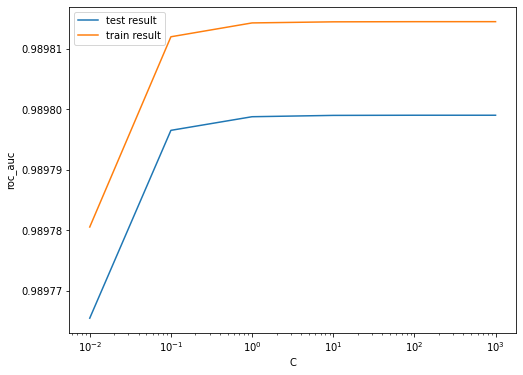

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897990327122651 at C = 100


In [ ]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=100)

In [ ]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221502   5949]
 [ 17741 209710]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9479228493169958
Sensitivity:- 0.9220007825861394
Specificity:- 0.9738449160478521


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.92      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



In [ ]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

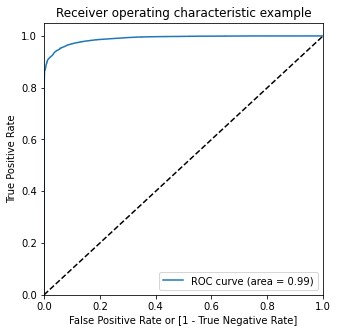

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55429  1435]
 [   11    87]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9746146553842913
Sensitivity:- 0.8877551020408163
Specificity:- 0.9747643500281373


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.89      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

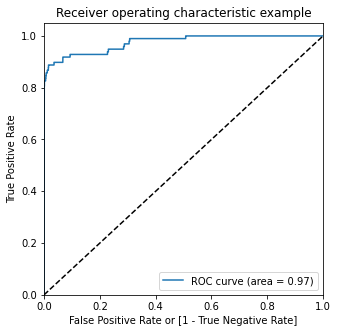

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set:**
Accuracy = 0.95
Sensitivity = 0.92
Specificity = 0.97
ROC = 0.99 ||| 
**Test set:**
Accuracy = 0.97
Sensitivity = 0.88
Specificity = 0.97
ROC = 0.97

XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=20)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=20),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.384599,0.054390,0.128317,0.005093,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.990524,0.990801,0.991137,0.990821,0.000251,6,0.990622,0.991081,0.991078,0.990927,0.000216
1,9.032714,0.023743,0.128655,0.002976,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.991267,0.990901,0.991127,0.991098,0.000151,4,0.991353,0.991115,0.991050,0.991173,0.000130
2,9.443300,0.016734,0.127982,0.001242,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.991059,0.990617,0.990907,0.990861,0.000184,5,0.991209,0.990855,0.990801,0.990955,0.000181
3,7.347498,0.057192,0.136412,0.001208,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.996474,0.997125,0.997037,0.996878,0.000288,1,0.996580,0.997255,0.996998,0.996945,0.000278
4,8.999083,0.058511,0.133788,0.001001,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.996637,0.996849,0.996689,0.996725,0.000091,2,0.996778,0.996994,0.996694,0.996822,0.000127
5,9.448156,0.044764,0.132578,0.003218,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.996607,0.996623,0.996897,0.996709,0.000133,3,0.996770,0.996829,0.996897,0.996832,0.000052


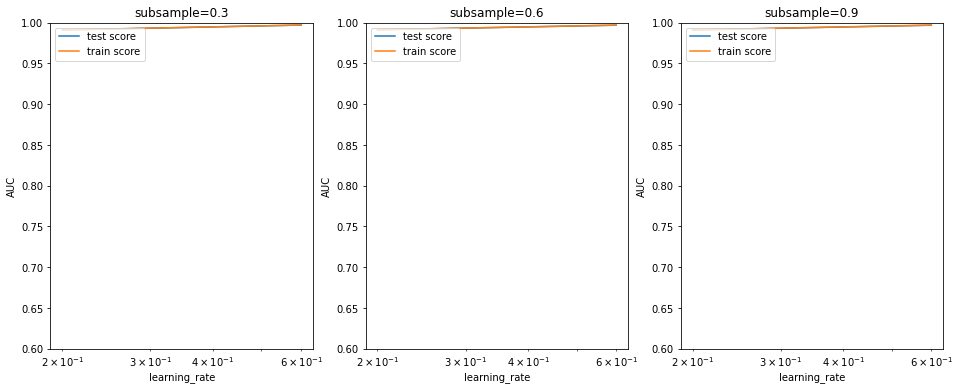

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[224860   2591]
 [  5572 221879]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9820554756848728
Sensitivity:- 0.9755024159049641
Specificity:- 0.9886085354647814


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    227451
           1       0.99      0.98      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9989261433149337

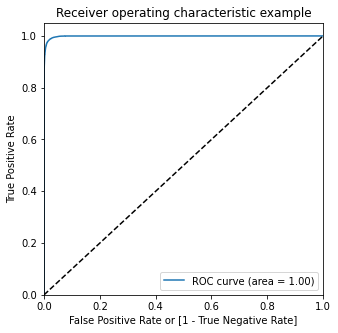

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56245   619]
 [   14    84]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9888873283943682
Sensitivity:- 0.8571428571428571
Specificity:- 0.9891143781654473


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.86      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.92      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9697910625279937

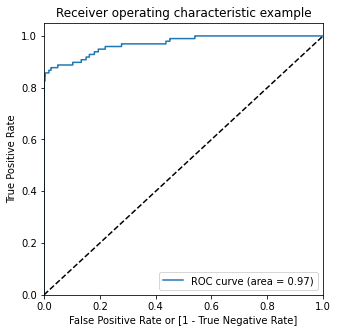

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set**: Accuracy = 0.98 Sensitivity = 0.98 Specificity = 0.99 ROC = 1 ||| **Test set**: Accuracy = 0.99 Sensitivity = 0.86 Specificity = 0.99 ROC = 0.97

Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 8, 2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 8, 2),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.749368,0.015699,0.044510,0.000774,2,50,50,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",0.955761,0.954975,0.955515,0.955417,0.000328,9
1,2.724892,0.008467,0.045039,0.001361,2,50,100,"{'max_depth': 2, 'min_samples_leaf': 50, 'min_...",0.955761,0.954975,0.955515,0.955417,0.000328,9
2,2.724119,0.005417,0.043849,0.000232,2,100,50,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",0.955761,0.954975,0.955515,0.955417,0.000328,9
3,2.732541,0.008111,0.044540,0.000604,2,100,100,"{'max_depth': 2, 'min_samples_leaf': 100, 'min...",0.955761,0.954975,0.955515,0.955417,0.000328,9
4,5.324224,0.011936,0.048619,0.000401,4,50,50,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.978764,0.983164,0.979038,0.980322,0.002013,6
5,5.349479,0.011445,0.048273,0.000348,4,50,100,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.978764,0.983164,0.979061,0.980330,0.002008,5
6,5.292835,0.023078,0.048599,0.000958,4,100,50,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.978765,0.983164,0.979034,0.980321,0.002013,7
7,5.273862,0.006460,0.048776,0.000180,4,100,100,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.978765,0.983164,0.979025,0.980318,0.002015,8
8,7.732386,0.009101,0.049178,0.000564,6,50,50,"{'max_depth': 6, 'min_samples_leaf': 50, 'min_...",0.989736,0.991744,0.990296,0.990592,0.000846,2
9,7.798290,0.016754,0.049950,0.000663,6,50,100,"{'max_depth': 6, 'min_samples_leaf': 50, 'min_...",0.989751,0.991757,0.990296,0.990601,0.000847,1


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9906011686921401
DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=6, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221575   5876]
 [  8844 218607]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9676413820998808
Sensitivity:- 0.9611168999037155
Specificity:- 0.9741658642960462


In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9910377766984623

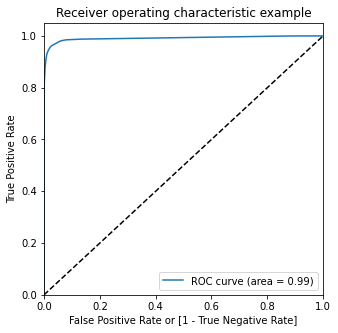

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [ ]:

# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1448]
 [   16    82]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9742986552438467
Sensitivity:- 0.8367346938775511
Specificity:- 0.9745357343837929


In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9269012244036612

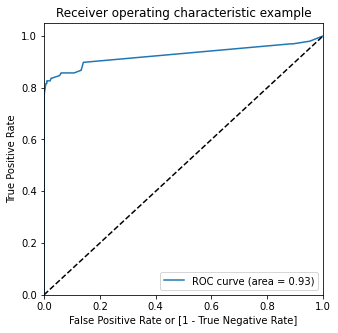

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set**: Accuracy = 0.97 Sensitivity = 0.84 Specificity = 0.97 ROC = 0.99 ||| **Test set**: Accuracy = 0.99 Sensitivity = 0.86 Specificity = 0.99 ROC = 0.93

**AdaSyn (Adaptive Synthetic Sampling)**

In [ ]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227433})


Logistic Regression

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.606711,0.029025,0.073529,0.002444,0.01,{'C': 0.01},0.964283,0.964388,0.964355,0.964342,0.000044,6,0.964364,0.964372,0.964381,0.964372,0.000007
1,1.651097,0.033588,0.074047,0.001741,0.1,{'C': 0.1},0.964263,0.964443,0.964403,0.964370,0.000077,1,0.964382,0.964393,0.964423,0.964399,0.000018
2,1.627906,0.053250,0.072461,0.000847,1,{'C': 1},0.964258,0.964446,0.964405,0.964370,0.000081,2,0.964380,0.964393,0.964425,0.964399,0.000019
3,1.655248,0.054268,0.072410,0.000146,10,{'C': 10},0.964257,0.964446,0.964405,0.964370,0.000081,3,0.964379,0.964393,0.964425,0.964399,0.000019
4,1.630301,0.041843,0.071143,0.000730,100,{'C': 100},0.964257,0.964446,0.964405,0.964369,0.000081,4,0.964379,0.964393,0.964425,0.964399,0.000019
5,1.914114,0.304503,0.083427,0.010982,1000,{'C': 1000},0.964257,0.964446,0.964405,0.964369,0.000081,5,0.964379,0.964393,0.964425,0.964399,0.000019


In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9643696187321447 at C = 0.1


In [ ]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207411  20040]
 [ 28110 199323]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8941488379454982
Sensitivity:- 0.8764031604912216
Specificity:- 0.9118931110436973
F1-Score:- 0.8922326968012247


In [ ]:

# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9643977907321236

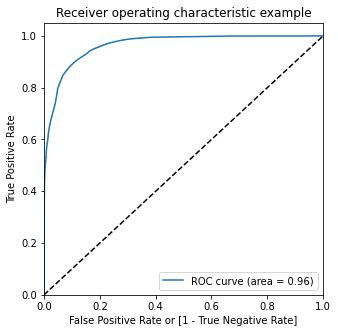

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51939  4925]
 [    9    89]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9133808503914891
Sensitivity:- 0.9081632653061225
Specificity:- 0.9133898424310636


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.91      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.973443529423587

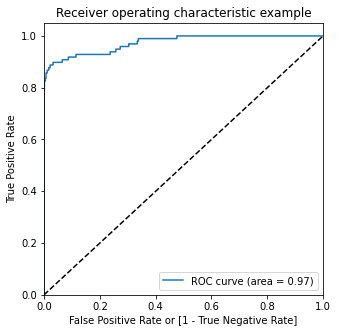

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model Summary:**Clearly this model is performing worse than previous ones

XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=20)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)     

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=20),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.196732,0.027294,0.130078,0.001488,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.967619,0.967955,0.967578,0.967717,0.000169,4,0.974335,0.976962,0.978383,0.976560,0.001677
1,8.884087,0.017007,0.129632,0.000619,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969622,0.965082,0.964764,0.966489,0.002219,6,0.974757,0.975632,0.979162,0.976517,0.001904
2,9.341733,0.075172,0.128436,0.000242,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.968089,0.964611,0.966892,0.966530,0.001442,5,0.973965,0.974945,0.979723,0.976211,0.002515
3,7.101464,0.038579,0.131236,0.000229,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.983039,0.977327,0.967449,0.975938,0.006440,2,0.990488,0.990974,0.993008,0.991490,0.001092
4,8.855189,0.027363,0.133007,0.001621,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.981977,0.978596,0.973495,0.978022,0.003486,1,0.990855,0.992221,0.992514,0.991864,0.000723
5,9.198609,0.057854,0.132332,0.002042,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.980270,0.978790,0.966468,0.975176,0.006187,3,0.989611,0.991276,0.993068,0.991318,0.001412


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:

# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':20,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 20,
                      'objective': 'binary:logistic', 'subsample': 0.6})

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227451      0]
 [     0 227433]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9758993501639979
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.997060281124888

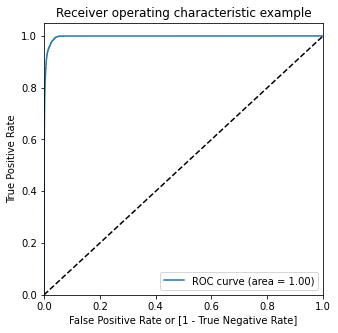

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55102  1762]
 [   12    86]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9688564306028581
Sensitivity:- 0.8775510204081632
Specificity:- 0.9690137872819359


In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9674262185177954

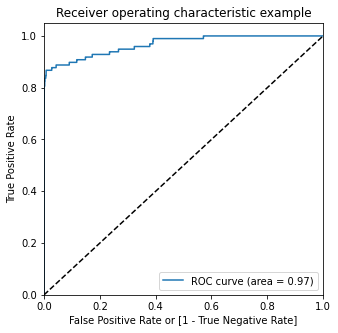

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set**: Accuracy = 0.98 Sensitivity = 1 Specificity = 1 ROC = 1 ||| **Test set**: Accuracy = 0.97 Sensitivity = 0.88 Specificity = 0.97 ROC = 0.97

**Choosing the best Model**

The techniques Oversampling, SMOTE and Adasyn were applied to handle imbalance in classes. With every data balancing thechnique I built several models.<br>Logistic regression and XGBoost showed very good performance. But since the problem statement needs highest accuracy and Sensitivity to minimize risk we can choose XGBoost with SMOTE balancing as the best model. 

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 4


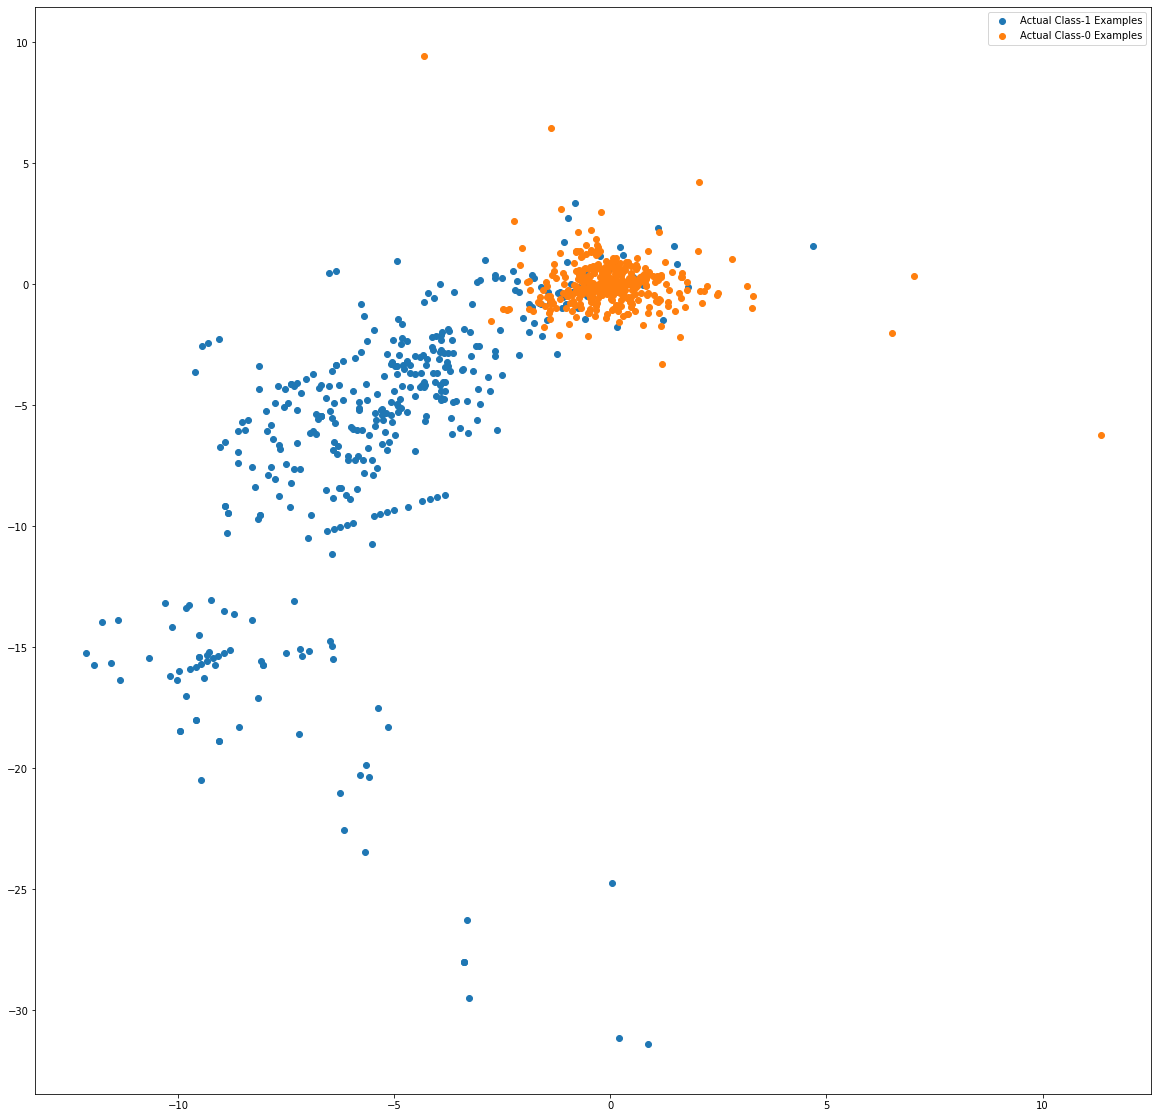

In [ ]:
var_imp = []
for i in xgb_bal_smote_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_bal_smote_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_bal_smote_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_bal_smote_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_bal_smote_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_bal_smote_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

Printing the metrics from best model

[[56245   619]
 [   14    84]]
Accuracy:- 0.9888873283943682
Sensitivity:- 0.8775510204081632
Specificity:- 0.9690137872819359


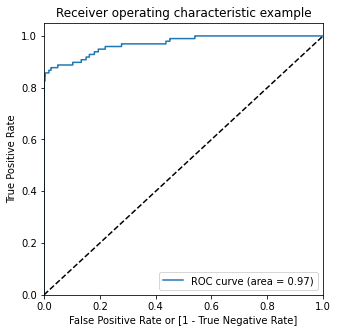

In [ ]:

# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)